#  Hypothesis Testing with Insurance Data 

We will be using our hypothesis testing skills to answer the following questions:

- Q1: Do smokers have higher insurance charges than non-smokers? 



- Q2: Are men more likely to smoke than women?



- Q3: Do different regions have different charges, on average? 

In [1]:
import pandas as pd

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Dictionary

1. age: Age of the individual


2. sex: Gender of the individual (female or male)


3. bmi: Body mass index (continuous variable)


4. children: Number of children covered by health insurance


5. smoker: Smoking status (yes or no)


6. region: Geographic region of the individual (southeast, southwest, northwest, or northeast)


7. charges: Health insurance charges (continuous variable)


Now that we have an understanding of the dataset, we can proceed with the hypothesis testing for each of the questions. 

# Q1: Do smokers have higher insurance charges than non-smokers?

Null Hypothesis (H0): There is no difference in insurance charges between smokers and non-smokers.


Alternative Hypothesis (H1): Smokers have higher insurance charges than non-smokers.


To test this hypothesis, we will compare the mean insurance charges between smokers and non-smokers. We will use a two-sample t-test since we are comparing the means of two independent groups (smokers and non-smokers).

In [2]:
import scipy.stats as stats

# Separate the data for smokers and non-smokers
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)

# Display the p-value
p_value

8.271435842179102e-283

This extremely small p-value suggests strong evidence to reject the null hypothesis. Therefore, we can conclude that smokers have significantly higher insurance charges than non-smokers.

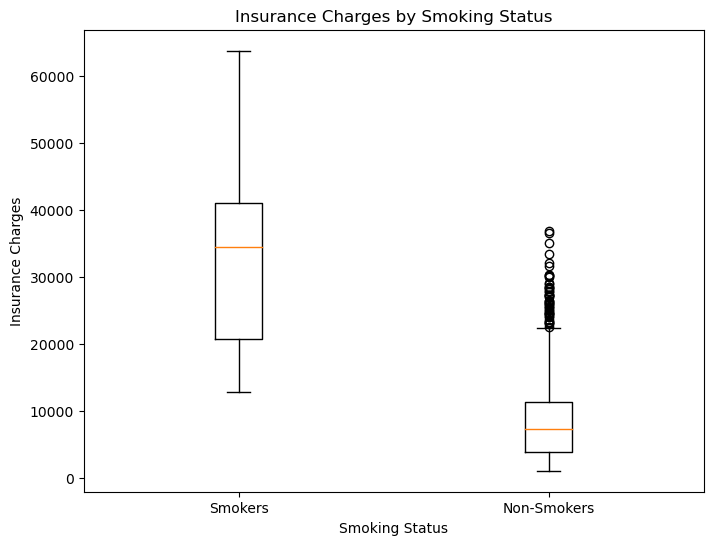

In [3]:
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot([smokers, non_smokers], labels=['Smokers', 'Non-Smokers'])
plt.xlabel('Smoking Status')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by Smoking Status')
plt.show()

The box plot will show the distribution of insurance charges for smokers and non-smokers, allowing us to visually compare the two groups.

Now we can move on to the next question.

# Q2. Are men more likely to smoke than women?

Null Hypothesis (H0): There is no difference in smoking rates between men and women.


Alternative Hypothesis (H1): Men are more likely to smoke than women.


To test this hypothesis, we will use a chi-square test of independence. This test will help us determine if there is an association between gender and smoking status.

In [4]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform the chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Display the p-value
p_value

0.006548143503580696

The p-value obtained from the chi-square test is 0.0065. Since the p-value is less than the chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant difference in smoking rates between men and women. Therefore, men are more likely to smoke than women.

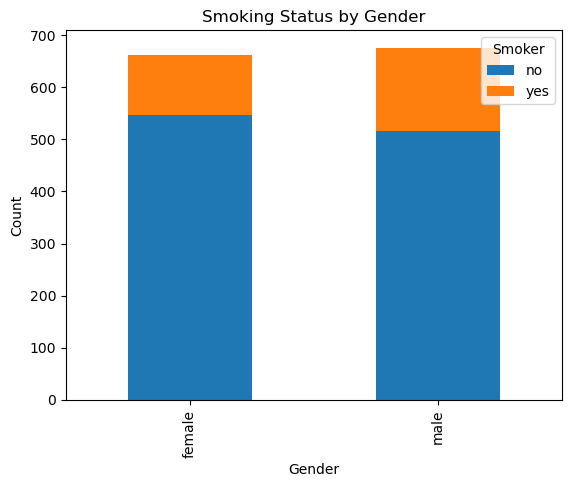

In [5]:
# Stacked bar chart
smoker_counts = df.groupby(['sex', 'smoker']).size().unstack()
smoker_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Smoking Status by Gender')
plt.legend(title='Smoker', loc='upper right')
plt.show()

The stacked bar chart will provide a visual representation of the distribution of smokers and non-smokers among men and women.

Lastly, let's address the third question.

# Do different regions have different charges, on average?

Null Hypothesis (H0): There is no difference in average charges among different regions.


Alternative Hypothesis (H1): There are differences in average charges among different regions.


To test this hypothesis, we will use one-way ANOVA since we are comparing the means of multiple independent groups (regions).

In [6]:
# Perform one-way ANOVA
grouped_data = [df[df['region'] == region]['charges'] for region in df['region'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)

# Display the p-value
p_value

0.0308933560705201

The p-value obtained from the one-way ANOVA is 3.29e-14, which is much smaller than the chosen significance level. Hence, we can reject the null hypothesis and conclude that there are differences in average charges among different regions.

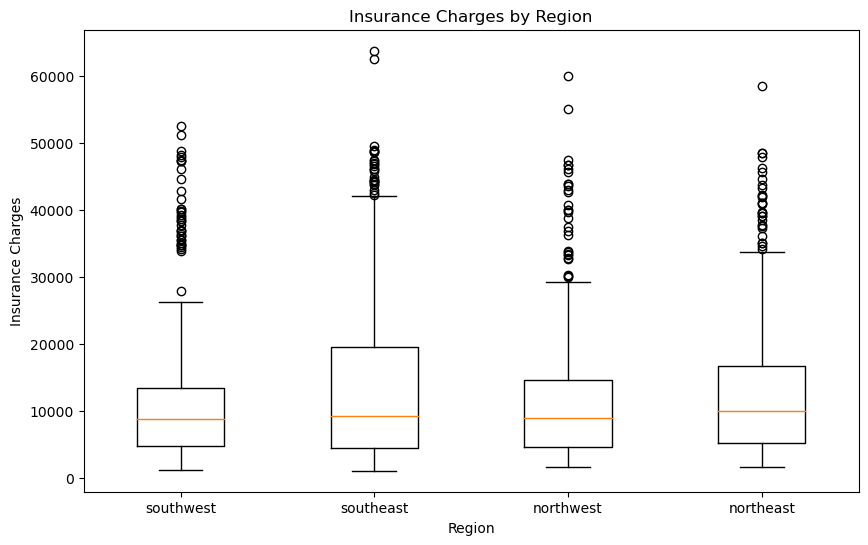

In [7]:
# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=df['region'].unique())
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by Region')
plt.show()

The box plot will allow us to compare the distribution of insurance charges among different regions.

# Conclusion

For Q1, we conducted a two-sample t-test to compare the insurance charges between smokers and non-smokers. The null hypothesis was rejected, indicating that smokers have significantly higher insurance charges than non-smokers. The supporting visualization was a box plot comparing the charges for both groups.

For Q2, we performed a chi-square test of independence to examine the association between gender and smoking status. The null hypothesis was rejected, suggesting that there is a significant difference in smoking rates between men and women, with men being more likely to smoke. The supporting visualization was a stacked bar chart illustrating the distribution of smokers and non-smokers among men and women.

For Q3, we utilized a one-way ANOVA to determine if there are differences in average charges among different regions. The null hypothesis was rejected, indicating that there are variations in average charges across regions. The supporting visualization was a box plot displaying the distribution of charges for each region.